In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

C:\Users\User\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
loc = (r'C:\Users\User\Documents\Python Scripts\Food Demand Forecasting\Data')

In [3]:
arr = os.listdir(loc)
arr

['fulfilment_center_info.csv',
 'meal_info.csv',
 'sample_submission.csv',
 'train.csv']

In [4]:
ful = pd.read_csv(loc+'\\fulfilment_center_info.csv')
meal = pd.read_csv(loc+'\\meal_info.csv')
df = pd.read_csv(loc+'\\train.csv')

In [5]:
ful.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [6]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [7]:
df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [8]:
ful.region_code.nunique()

8

In [9]:
# I merged the columns from all of the datasets to see if there is additional information that can help the model more accurately

In [10]:
df = df.merge(meal,on='meal_id')

In [11]:
df = df.merge(ful,on='center_id')

In [12]:
df.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

## EDA

In [13]:
#First off I will look at a breakdown of the number unique id's (This can have multiple order per id) broken down by the cuisine. We can see that Beverages are clearly sold the most. In general, beverages would be seen as cheaper than full meals so we would expect to see higher sales of this. The rest of the meals are relatively evenly spread.

C:\Users\User\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '2.6.2' or newer of 'numexpr' (version '2.6.1' currently installed).
  warnings.warn(msg, UserWarning)


<Figure size 1080x1080 with 0 Axes>

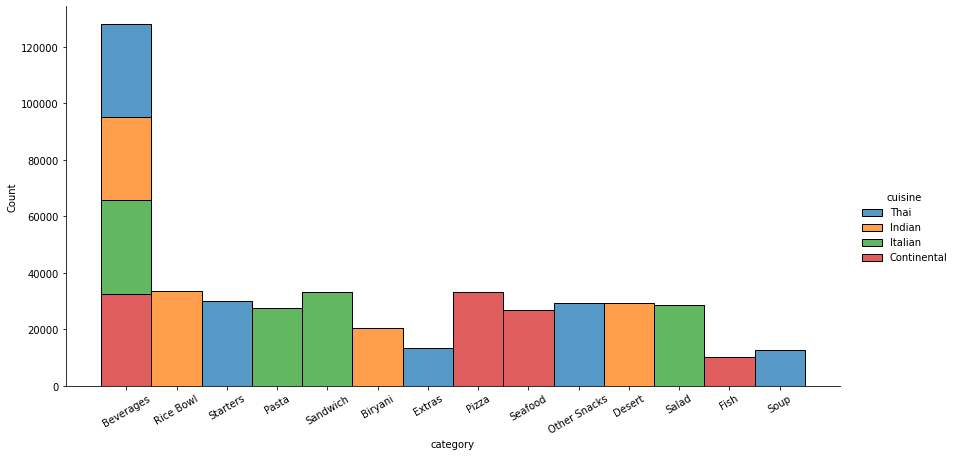

In [14]:
fig = plt.figure(figsize=(15,15))
g = sns.displot( x='category',data = df,hue ='cuisine',height=6,aspect=2,multiple='stack')
g.set_xticklabels(rotation=30)
plt.show()

In [15]:
# average base price of each of the meals.
# seafood, fish and pizza have the highest price among the meals / categories

In [16]:
df.groupby(['category'])['base_price'].mean()

category
Beverages       226.854609
Biryani         460.962293
Desert          466.559037
Extras          204.934888
Fish            596.939319
Other Snacks    273.385964
Pasta           428.045511
Pizza           643.765222
Rice Bowl       339.386778
Salad           300.579144
Sandwich        305.233585
Seafood         665.176243
Soup            231.415428
Starters        284.118421
Name: base_price, dtype: float64

In [17]:
# looking at the total price received by week and cuisine.
# interesting to see that there is such a large discrepancy btw the continental cuisine and the rest of the cuisine's when it come to the total base_price sold
# the higher priced meals (pizza and seafood) fall under the continental cuisine
# besides, the total base price drops around the same time among all of the cuisine's

In [18]:
top_cont = df[df['cuisine'] == 'Continental'].groupby('category').num_orders.sum()
top_cont

category
Beverages    5943046
Fish          871959
Pizza        7383720
Seafood      2715714
Name: num_orders, dtype: int64

In [19]:
# observe what the price difference is btw the base and the checkout price
# this could show whteher the total prices are mainly driven by the discount
# Thai food seemed to have the most consistent price btw the base and checkout price,
# while the continental food had the largest difference btw the base and checkout price

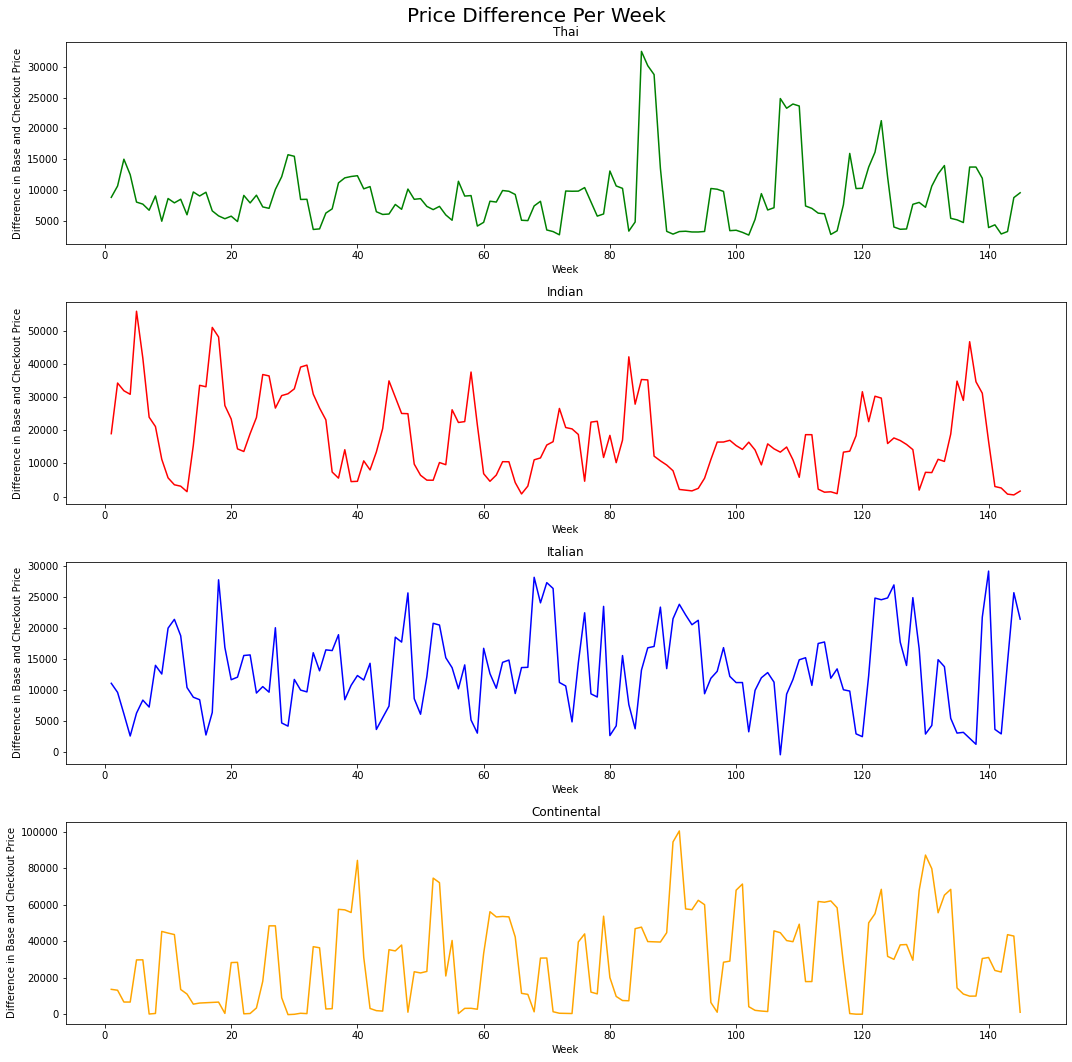

In [20]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,figsize=(15,15))
subs = [ax1,ax2,ax3,ax4]
color = ['green','red','blue','orange']
for typ, sub, col in zip(list(df['cuisine'].unique()),subs,color):
    weekwise = df[df['cuisine'] == typ].groupby('week').base_price.sum() - df[df['cuisine'] == typ].groupby('week').checkout_price.sum()
    sub.plot(weekwise,color = col)
    sub.set_title(typ)
    sub.set_xlabel('Week')
    sub.set_ylabel('Difference in Base and Checkout Price')

fig.suptitle('Price Difference Per Week',fontsize=20)
fig.subplots_adjust(top=0.90)
plt.xlabel('Week')
fig.tight_layout()
plt.show()

In [21]:
# after looking at the price, take a look at which categories were the leading the overall number of order
# weekly sales of the top 6 number of orders
# the lower cost items were the leaders for the number of orders, 
# with Pizza being the lone higher priced item that made it into the top 6

In [22]:
top6 = df.groupby('category').num_orders.sum()
top6

category
Beverages       40480525
Biryani           631848
Desert           1940754
Extras           3984979
Fish              871959
Other Snacks     4766293
Pasta            1637744
Pizza            7383720
Rice Bowl       20874063
Salad           10944336
Sandwich        17636782
Seafood          2715714
Soup             1039646
Starters         4649122
Name: num_orders, dtype: int64

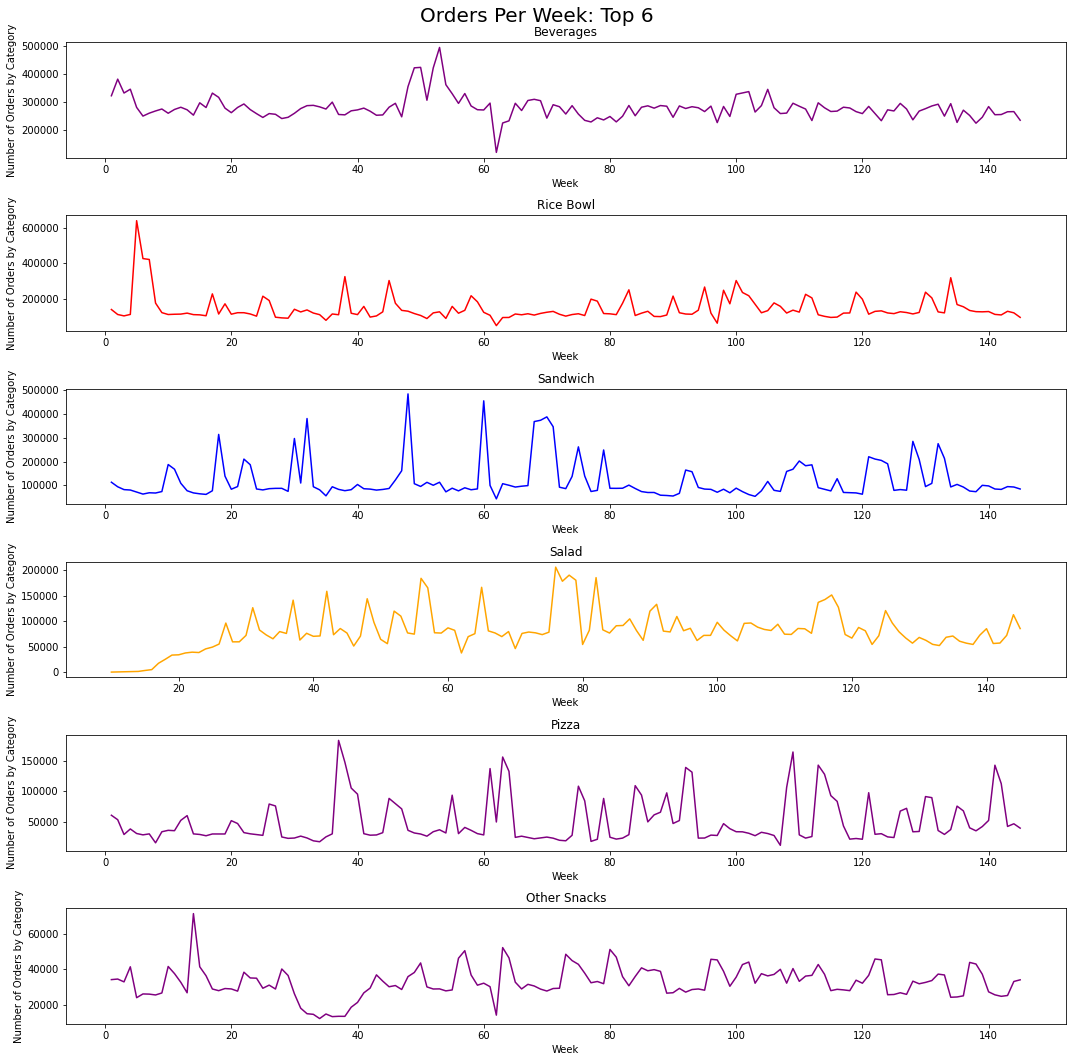

In [23]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,figsize = (15,15))
top6 = ['Beverages','Rice Bowl','Sandwich','Salad','Pizza','Other Snacks']
color = ['purple','red','blue','orange','purple','purple']
subs = [ax1,ax2,ax3,ax4,ax5,ax6]
for typ,sub,col in zip(top6,subs,color):
    weekwise = df[df['category'] == typ].groupby('week').num_orders.sum()
    sub.plot(weekwise,color = col)
    sub.set_title(typ)
    sub.set_xlabel('Week')
    sub.set_ylabel('Number of Orders by Category')
    
fig.suptitle('Orders Per Week: Top 6',fontsize=20)
fig.subplots_adjust(top=0.9)
plt.xlabel('Week')
fig.tight_layout()
plt.show()


In [ ]:
# The next graphs that are presented a violin plot showing 
# the density in the Checkout Price by a Promotion on a certain item and whether it has been Featured on the HomePage. 
# In both cases when there was a promotion or featured on the HomePage (1), are mostly congregated around 300 and 500.

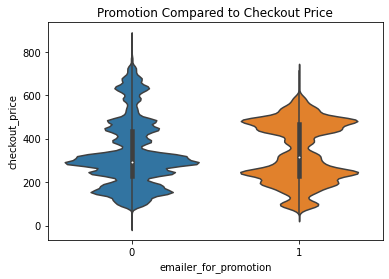

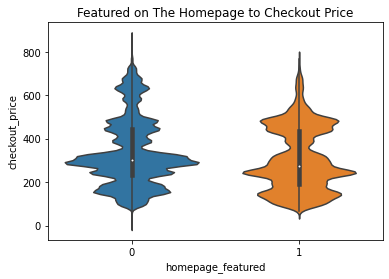

In [25]:
plt.clf()
sns.violinplot(data=df,x='emailer_for_promotion',y='checkout_price')
plt.title('Promotion Compared to Checkout Price')
plt.show()
sns.violinplot(data=df,x='homepage_featured',y='checkout_price')
plt.title('Featured on The Homepage to Checkout Price')
plt.show()

In [26]:
norm_df = df
norm_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5
456544,1060716,142,61,2104,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5
456545,1029231,143,61,2104,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5
456546,1141147,144,61,2104,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5


In [27]:
# in order to present a more normally distributed base and checkout price,
# I took the log of each of the columns

In [28]:
norm_df['log_check'] = np.log(df['checkout_price'])
norm_df['log_base'] = np.log(df['base_price'])
norm_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,log_check,log_base
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,4.918739,5.025787
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0,4.911404,5.025787
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0,4.889747,4.897243
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0,4.911625,4.904237
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0,4.987025,4.993828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5,6.368239,6.446561
456544,1060716,142,61,2104,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5,6.364802,6.366522
456545,1029231,143,61,2104,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5,6.368239,6.364802
456546,1141147,144,61,2104,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5,6.366522,6.364802


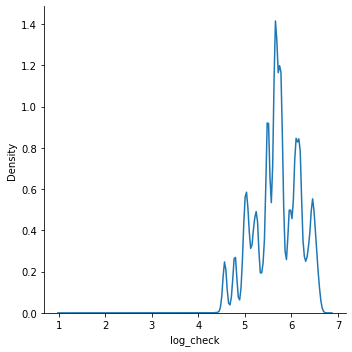

In [29]:
sns.displot(data=norm_df,x='log_check',kind='kde')
plt.show()

# Data Preparation

In [30]:
norm_df = norm_df.drop(['checkout_price','base_price','center_id','meal_id','id'],axis=1)

In [33]:
dtyp=[]
for col in norm_df.columns[0:]:
    if col == 'num_orders':
        next
    else:
        dtyp.append(col)
dtyp.append('num_orders')
dtyp

['week',
 'emailer_for_promotion',
 'homepage_featured',
 'category',
 'cuisine',
 'city_code',
 'region_code',
 'center_type',
 'op_area',
 'log_check',
 'log_base',
 'num_orders']

In [35]:
norm_df = norm_df[dtyp]

In [36]:
from sklearn import preprocessing

for col in ['op_area','log_check','log_base']:
    x = np.array(norm_df[col])
    x = np.reshape(x,(-1,1))
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    norm_df[col] = x_scaled
    

In [37]:
for col in norm_df.columns[:8]:
    norm_df = pd.get_dummies(norm_df,columns=[col],prefix=[col])

In [38]:
target = norm_df.iloc[:,3]
xinfo = norm_df.drop(['num_orders'],axis=1)
xinfo

,op_area,log_check,log_base,week_1,week_2,week_3,week_4,week_5,week_6,week_7,...,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C
0,0.180328,0.674846,0.367970,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.180328,0.673553,0.367970,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.180328,0.669738,0.321236,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.180328,0.673592,0.323779,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.180328,0.686877,0.356351,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,0.590164,0.930235,0.884518,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
456544,0.590164,0.929630,0.855418,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
456545,0.590164,0.930235,0.854793,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
456546,0.590164,0.929933,0.854793,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [39]:
# use the train_test_split to split the data into a training and testing dataset
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(xinfo,target,test_size=.2,random_state=10)

# Models
I chose to run a couple different linear models, a decision tree and the support vector regressor. After running the linear regression, lasso, SGD Regression and support vector regression model, they resulted in an R sqaured value lower than 50%. The decision tree provides an R squared value of over 70%.

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn.linear_model import SGDRegressor

In [41]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)
pre_linear = linreg.predict(x_test)
r_sq = linreg.score(x_test, y_test)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.4511033376923772


In [42]:
#Ran a for loop to determine the best tradeoff between number of branches and accuracy of the results
score_list = []

for i in range(2,20):
    decreg = DecisionTreeRegressor(max_depth = i)
    decreg.fit(x_train, y_train)
    pre_tree = decreg.predict(x_test)
    r_sq = decreg.score(x_test, y_test)
    score_list.append(r_sq)

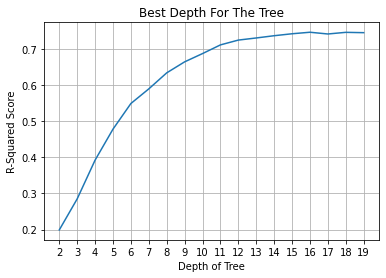

In [43]:
fig = plt.figure()
plt.plot(list(range(2,20)), score_list)
plt.title("Best Depth For The Tree")
plt.xticks(list(range(2,20)))
plt.ylabel("R-Squared Score")
plt.xlabel("Depth of Tree")
plt.grid()
plt.show()

In [44]:
decreg = DecisionTreeRegressor(max_depth = 12)
decreg.fit(x_train, y_train)
r_sq = decreg.score(x_test, y_test)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.7281095353961788


In [45]:
new_alp = []

for i in np.arange(0.5,5,.5):
    lasreg = Lasso(alpha=i)
    lasreg.fit(x_train, y_train)
    pre_linear = lasreg.predict(x_test)
    r_sq = lasreg.score(x_test, y_test)
    new_alp.append(r_sq)

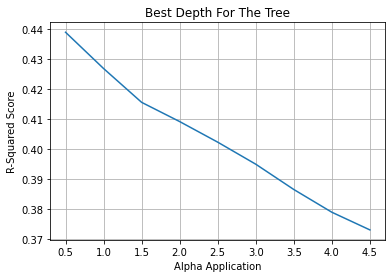

In [46]:
fig = plt.figure()
plt.plot(np.arange(0.5,5,.5), new_alp)
plt.title("Best Depth For The Tree")
plt.xticks(np.arange(0.5,5,.5))
plt.ylabel("R-Squared Score")
plt.xlabel("Alpha Application")
plt.grid()
plt.show()

In [47]:
loss_func = []

for loss in ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']:
    SGDreg = SGDRegressor(loss= loss)
    SGDreg.fit(x_train, y_train)
    pre_SGD = linreg.predict(x_test)
    loss_func.append(pre_SGD)
    r_sq = SGDreg.score(x_test, y_test)
    print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.4502233866985179
Coefficient of determination: 0.03311816003907131
Coefficient of determination: 0.2539643496559997
Coefficient of determination: 0.45066722859731223


In [48]:
for i in range(0,5):
    svreg = svm.LinearSVR(epsilon=i)
    svreg.fit(x_train, y_train)
    pre_svr = svreg.predict(x_test)
    r_sq = svreg.score(x_test, y_test)
    print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.33895527078796595
Coefficient of determination: 0.338581394925347
Coefficient of determination: 0.3385859416825573
Coefficient of determination: 0.3390507431683002
Coefficient of determination: 0.3386974103454785


# Conclusion
Although the decision tree regressor provides a much higher R squared value (accuracy) than the other models, but this would probably be unacceptable for any restaurant to use for determining the number of orders. With an accuracy slightly above 70%, it may be result in some more accurate predictions for future orders, but it may give the user too much confidence in the model. This could result in under investment in the food required, which may not be enough for the demand. When customers start losing trust in a restaurant, it can result in a lot of lost sales in the future.